 # <center>Heart_Attack_Prediction  

## introduction
This project is designed to predict whether a person is likely to have a heart attack or not based on various risk factors such as age, gender, blood pressure, cholesterol, etc. The prediction is made using different machine learning algorithms, including logistic regression, decision tree, random forest, K-nearest neighbors (KNN), and neural network.

In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_predict

In [349]:
data = pd.read_csv('heart.csv')

## dataset rows
age: Age of the individual (numerical).

sex: Gender of the individual (categorical, 0 for female and 1 for male).

cp: Chest pain type experienced by the individual (categorical). It can take values from 0 to 3, representing different types of chest pain.

trtbps: Resting blood pressure of the individual (numerical).

chol: Serum cholesterol level in mg/dl (numerical).

fbs: Fasting blood sugar level (categorical, 0 for <= 120 mg/dl and 1 for > 120 mg/dl).

restecg: Resting electrocardiographic results (categorical, 0, 1, or 2).

thalachh: Maximum heart rate achieved during exercise (numerical).

exng: Exercise-induced angina (categorical, 0 for no, and 1 for yes).

oldpeak: ST depression induced by exercise relative to rest (numerical).

slp: Slope of the peak exercise ST segment (categorical).

caa: Number of major vessels colored by fluoroscopy (numerical).

thall: Thallium stress test result (categorical).

output: The target variable (categorical, 0 for no heart attack and 1 for heart attack).

The goal of this dataset is to predict whether an individual is likely to have a heart attack based on the given risk factors (features). The output column serves as the target variable, which we want to predict using various machine learning models.

Each row in the dataset represents an individual with specific risk factors, and the output column indicates whether they experienced a heart attack or not.
# link 
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


# Explore the dataset

In [350]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [351]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [352]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [353]:
data.shape

(303, 14)

# <center><b>1-Univariate Exploration</b></center>

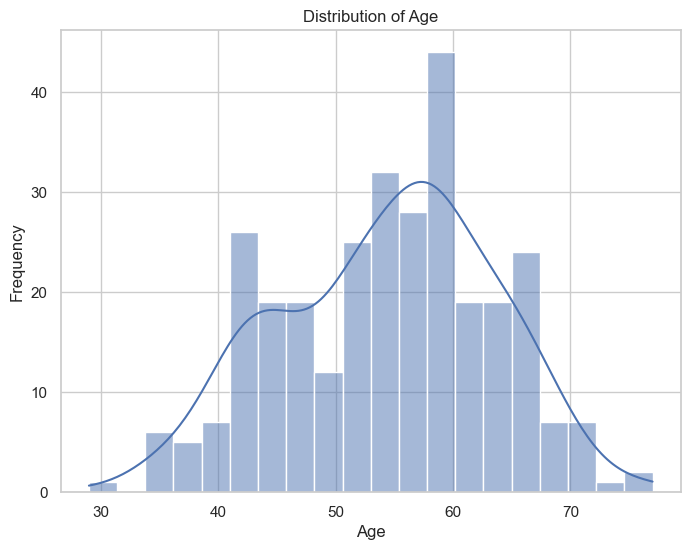

In [354]:
# Set the style of seaborn
sns.set(style="whitegrid")
# Univariate Exploration - Age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


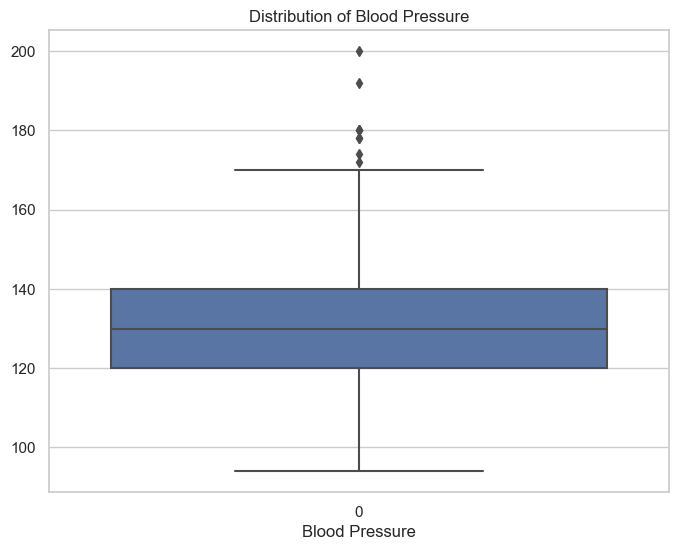

In [355]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Univariate Exploration - Blood Pressure
plt.figure(figsize=(8, 6))
sns.boxplot(data['trtbps'])
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.show()

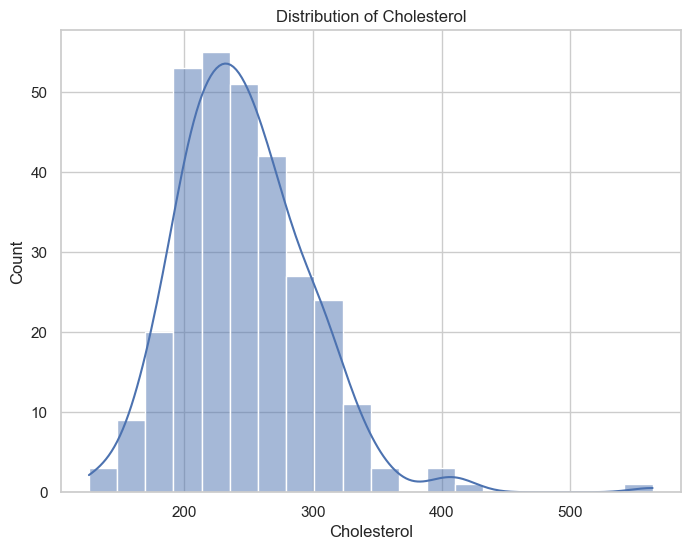

In [356]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Univariate Exploration - Cholesterol
plt.figure(figsize=(8, 6))
sns.histplot(data['chol'], bins=20, kde=True)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.show()

# <center><b>2-Bivariate Exploration</b></center>

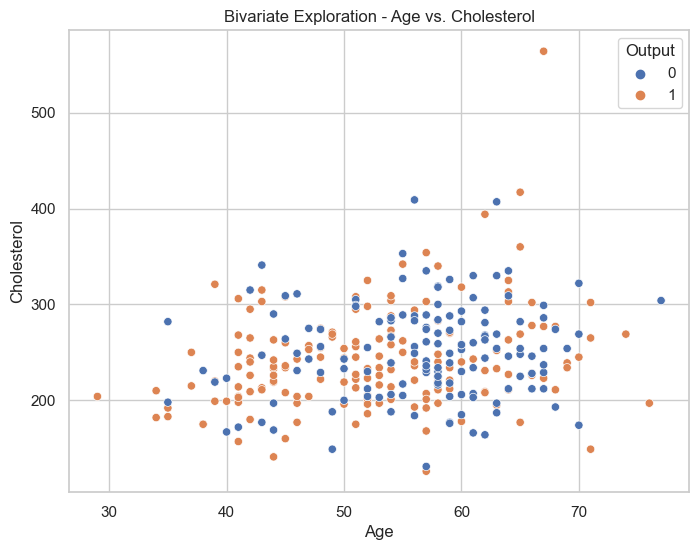

In [357]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate Exploration - Age vs. Cholesterol
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', data=data, hue='output')
plt.title('Bivariate Exploration - Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Output')
plt.show()

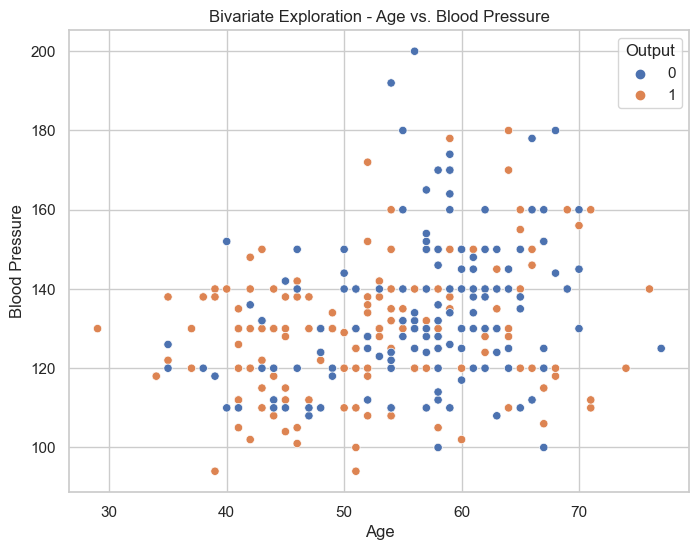

In [358]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate Exploration - Age vs. Blood Pressure
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='trtbps', data=data, hue='output')
plt.title('Bivariate Exploration - Age vs. Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend(title='Output')
plt.show()

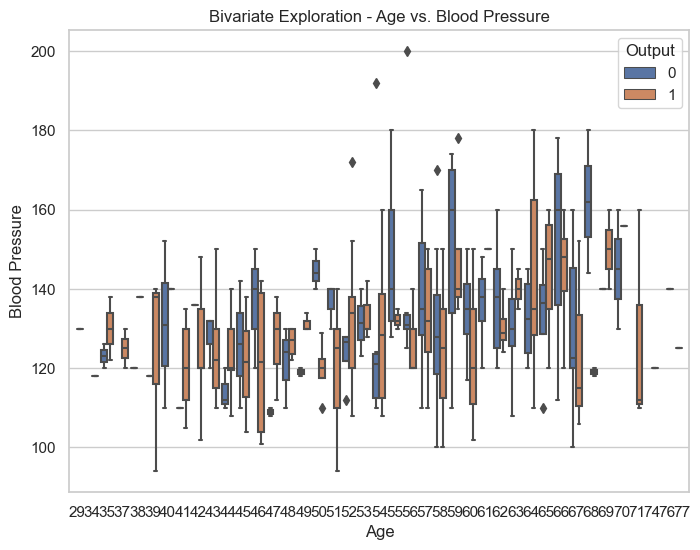

In [359]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate Exploration - Age vs. Blood Pressure
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', y='trtbps', data=data, hue='output')
plt.title('Bivariate Exploration - Age vs. Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend(title='Output')
plt.show()

# <center><b>Heatmap </b></center>

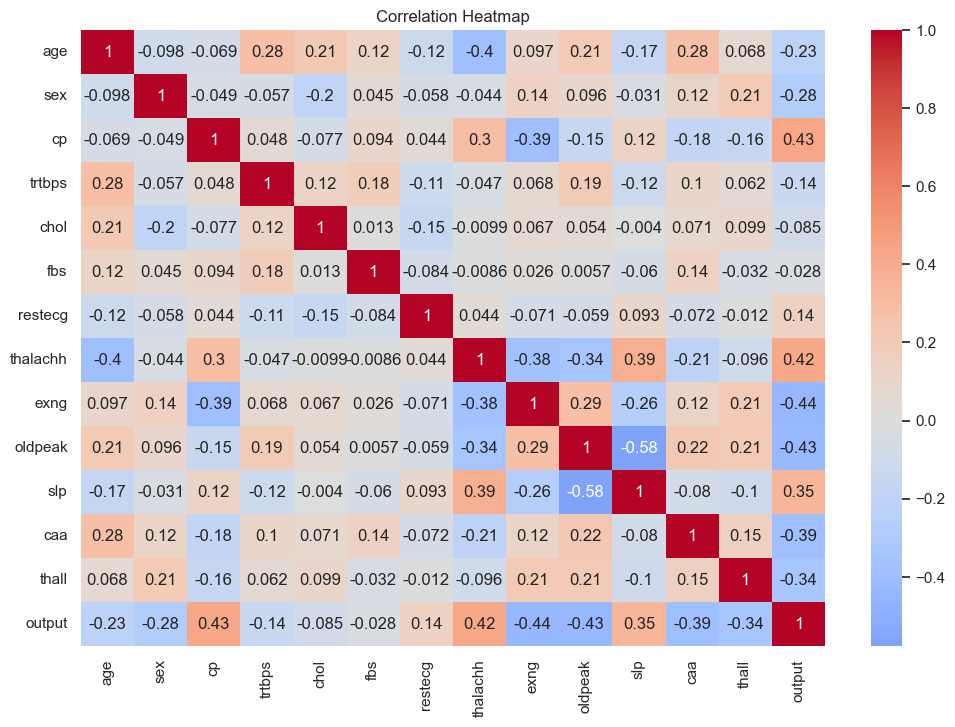

In [360]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## make groupby and pie graph to see how the percentage [ male and female]

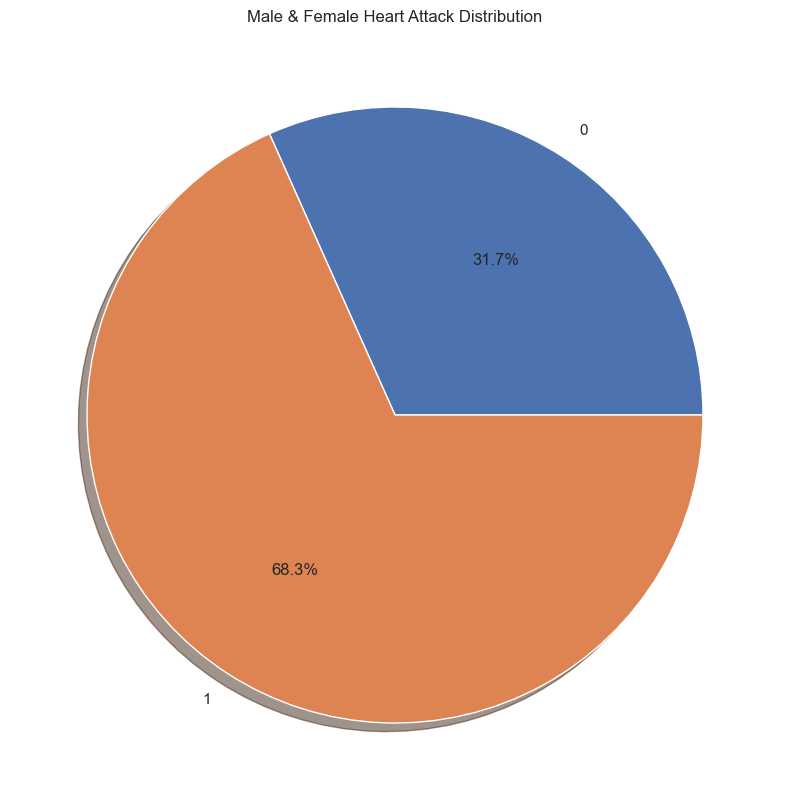

In [361]:

# 1 male & 0 female
gender_distribution = data.groupby('sex')['output'].count()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(10, 10), title="Male & Female Heart Attack Distribution")
plt.ylabel('')
plt.show()

## Scatter Plot using Plotly


In [362]:
# Scatter Plot using Plotly
fig = px.scatter(data, x='age', y='chol', color='output', title='Influence of Age and Cholesterol')
fig.show()

### Groupby and Pie Chart for Chest Pain Type Distribution

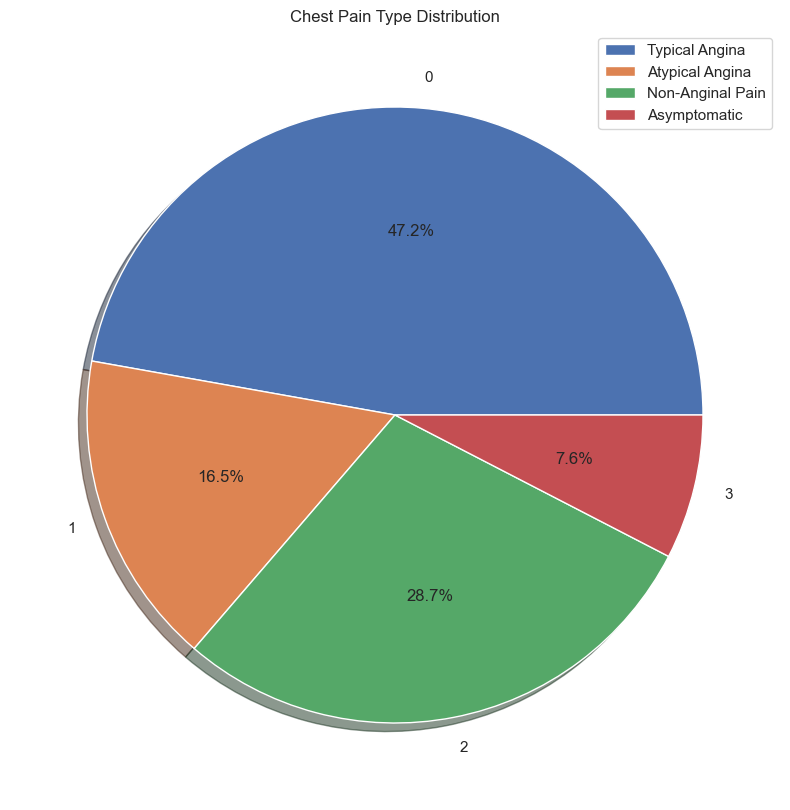

In [363]:
# Groupby and Pie Chart for Chest Pain Type Distribution
chest_pain_distribution = data.groupby('cp')['output'].count()
chest_pain_distribution.plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(10, 10))
plt.title("Chest Pain Type Distribution")
plt.ylabel('')
plt.legend(["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"], loc="best")
plt.show()

## Scatter plot between features and each other according to the output

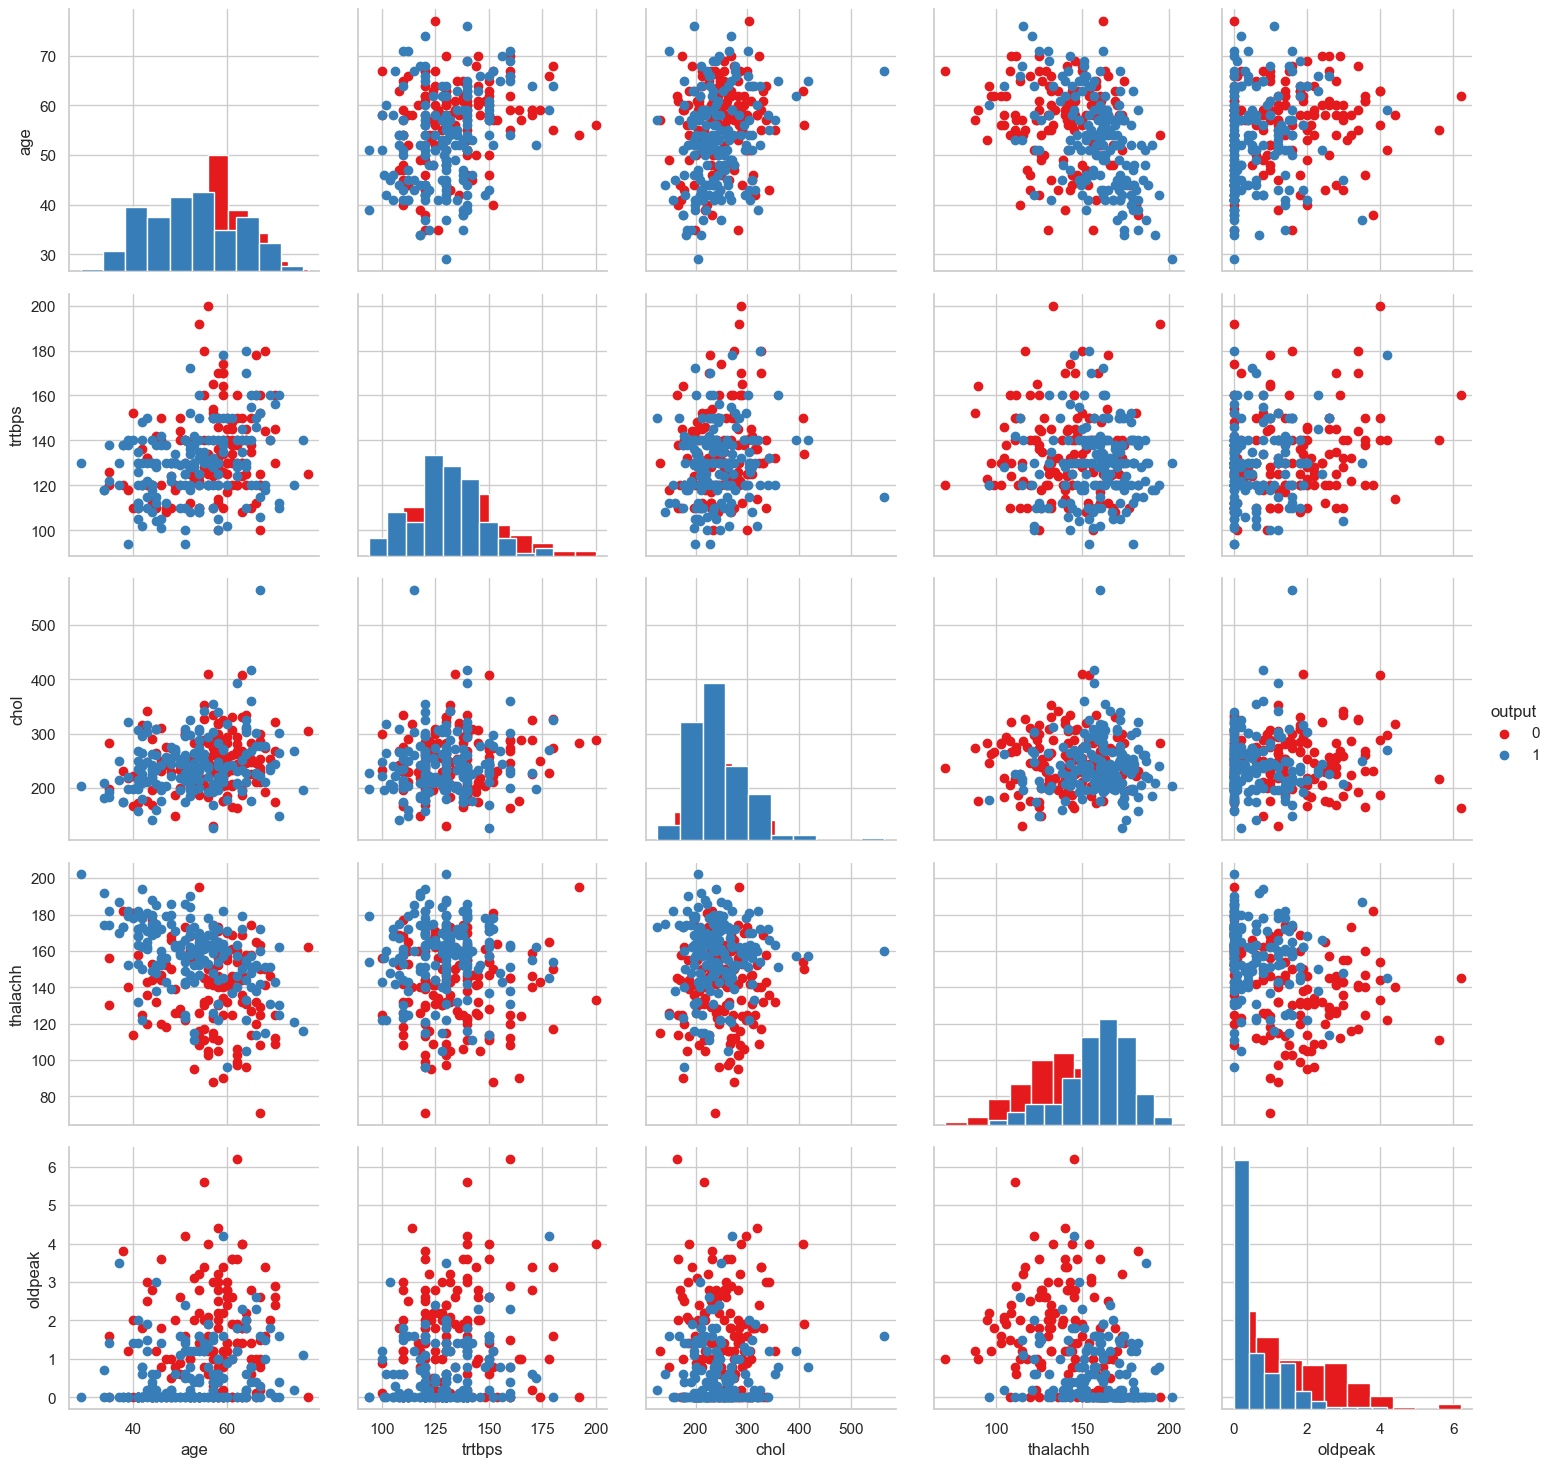

In [364]:

g = sns.PairGrid(data, vars=['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'], hue='output', height=3, palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [365]:
# Split the data into features (X) and target (y)
X = data.drop('output', axis=1)
y = data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# chose the best performing model 

In [366]:
# Create instances of the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(),
    'SVM': SVC(probability=True)
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print the results
print("Model Performance:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

# Select the best-performing model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print("Best Model:", best_model_name)


Model Performance:
Logistic Regression: 0.8525
Decision Tree: 0.8361
Random Forest: 0.8525
KNN: 0.9016
Neural Network: 0.8525
SVM: 0.8689
Best Model: KNN


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



the best model is knn 

# KNeighborsClassifier (KNN)

In [383]:
# Perform cross-validation predictions
cross_val_y_pred_best = cross_val_predict(best_model, X_test, y_test, cv=20) #The least populated class in y has only 29 members, which is less than n_splits=30.
print(cross_val_y_pred_best)

[0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0]


In [385]:
sum(cross_val_y_pred_best == y_test)/len(y_test)

0.8360655737704918

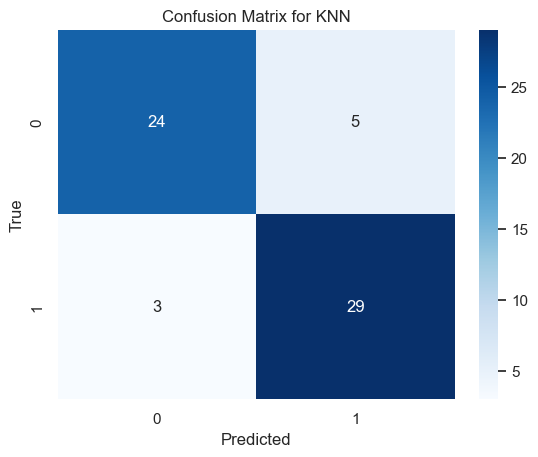

In [368]:
# Confusion Matrix for the best model
conf_matrix = confusion_matrix(y_test, cross_val_y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()


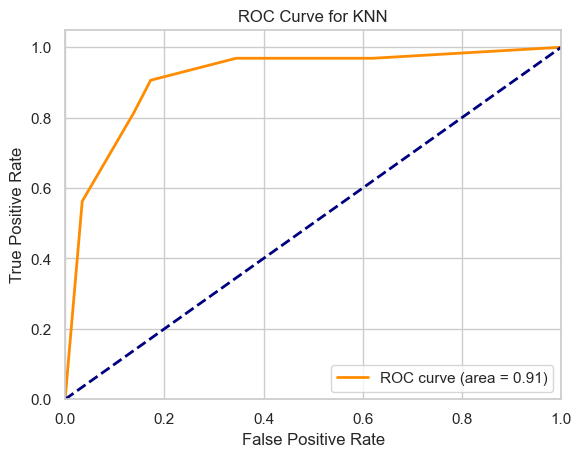

In [369]:
# ROC Curve for the best model
cross_val_y_pred_prob = cross_val_predict(best_model, X_test, y_test, cv=5, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, cross_val_y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model_name}')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [370]:
# Train and Evaluate Logistic Regression Model
lr_model = LogisticRegression()  # You can adjust parameters as needed
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print('Logistic Regression Model')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))
print('Classification Report:')
print(classification_report(y_test, y_pred_lr))


Logistic Regression Model
Confusion Matrix:
[[25  4]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



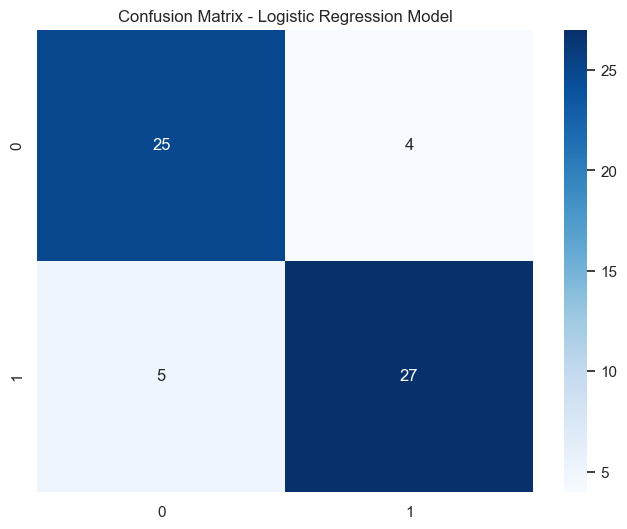

In [371]:
# Visualize Confusion Matrix for Logistic Regression Model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

# Decision Tree

In [372]:
#Data Preprocessing
X = data.drop('output', axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [373]:
# Step 4: Model Training and Evaluation
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Decision Tree Accuracy: {accuracy:.4f}")


Model Performance:
Decision Tree Accuracy: 0.7541


In [374]:

# Step 5: Decision Tree Visualization
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=500)
plot_tree(model, feature_names=X.columns.tolist(), class_names=['No Heart Disease', 'Heart Disease'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [375]:
# Calculate Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)



Precision: 0.84
Recall: 0.65625


In [376]:
# Calculate precision-recall curve values
precision, recall, _ = precision_recall_curve(y_test, y_pred)


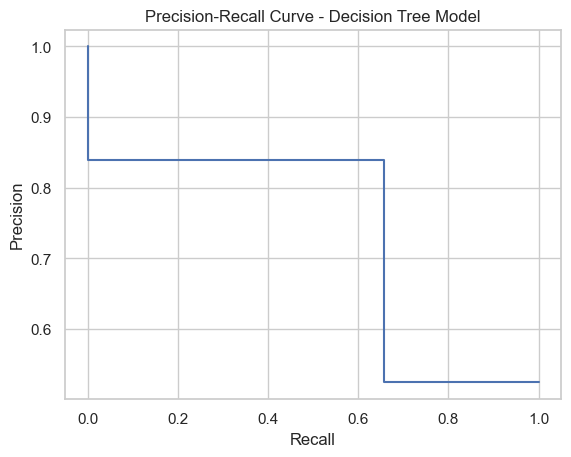

In [377]:

# Plot Precision-Recall Curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve - Decision Tree Model')
plt.show()